In [1]:
%display latex

In [2]:
from sage.combinat.q_analogues import *
from sage.combinat.sf.sfa import *
from itertools import product

In [1]:
Sym = SymmetricFunctions(QQ)
Sym.inject_shorthands()

Defining e as shorthand for Symmetric Functions over Rational Field in the elementary basis
Defining f as shorthand for Symmetric Functions over Rational Field in the forgotten basis
Defining h as shorthand for Symmetric Functions over Rational Field in the homogeneous basis
Defining m as shorthand for Symmetric Functions over Rational Field in the monomial basis
Defining p as shorthand for Symmetric Functions over Rational Field in the powersum basis
Defining s as shorthand for Symmetric Functions over Rational Field in the Schur basis


In [2]:
Qqt=QQ['q','t']
Rqt=FractionField(Qqt)
Sym = SymmetricFunctions(Rqt)
S = SymmetricFunctions(QQ)
Sym.inject_shorthands(verbose=False)
H = Sym.macdonald().Ht()
t=H.t
q=H.q

s.set_print_style('length')
e.set_print_style('length')
H.set_print_style('length')

One=s([])
X=tensor([s[1],s[0]])
Y=tensor([s[0],s[1]])
M=(1-q)*(1-t)
def mystr(i): 
    if i<10: 
        return str(i) 
    else: 
        return ''.join([str(i),"."])

In [3]:
def InSchur(F):
    try:
        return s(Sym(S.from_polynomial(Rqt(F).numerator()))).restrict_partition_lengths(2,exact=false)
    except:
        return F

In [4]:
# Construction récursive des vecteurs (alpha,delta,beta)
def f(L,v,i,n,a,b,k):
    if n==a-2:
        v[k]+=1
        L.append(v)
    else:
        r=copy(v)
        r[i]+=1
        f(L,r,i,n+1,a,b,k)
        if i<2*k:
            f(L,v,i+1,n,a,b,k)

# Construction des vecteurs (alpha,delta,beta) pour k fixé
def vectors(a,b,k):
    M=[]
    v=[0]*(2*k+1)
    f(M,v,0,0,a,b,k)
    return M

In [5]:
# Polynôme associé à un vecteur (alpha,delta,beta) fixé
def monomials(M,b,s):
    i=M[s]
    r=1
    k=len(i)//2
    for j in range(k):
        if i[j]!=0:
            r=r*(q^(b-j)*t^j)^i[j]
        if i[2*k-j] !=0 :
            r=r*(t^(b-j)*q^j)^i[2*k-j]
    r=r*(q*t)^(k*(i[k]+1))*h([(b-2*k)*(i[k]+1)]).expand(2,alphabet='q,t')
    return r

# Somme des polynômes associés aux vecteurs (alpha,delta,beta) pour k fixé
def polynomials(M,b):
    P=0
    for s in range(len(M)):
        P=P+monomials(M,b,s)
    return P

# h_a[h_b(q,t)]
def multinomials(a,b):
    P=0
    for k in range(b//2+1):
        P=P+polynomials(vectors(a,b,k),b)
    return P

In [6]:
InSchur(multinomials(4,4))

s[16] + s[14, 2] + s[13, 3] + 2*s[12, 4] + 2*s[10, 6] + s[8, 8]

In [7]:
# Vecteur obtenu par sommation des premières coordonnées
def dominance(x):
    t=[]
    r=0
    for i in range(len(x)):
        r=r+x[i]
        t=t+[r]
    return t

# Relation de dominance
def cover(x,y):
    r=derive(x)
    s=derive(y)
    for i in range(len(x)):
        if r[i]>s[i]:
            return False
    return True

In [8]:
W=vectors(8,3,0)
elements=tuple(tuple(i) for i in W)
Poset((elements,cover)).plot()

NameError: name 'derive' is not defined

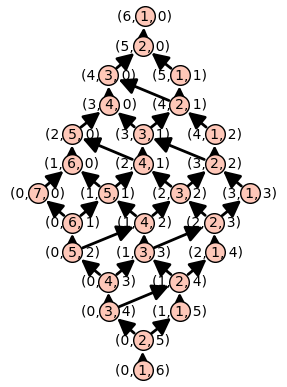

In [ ]:
W=vectors(8,3,1)
elements=tuple(tuple(i) for i in W)
Poset((elements,cover)).plot()